In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("../Dataset.xlsx", sheet_name=['Weather', 'Total Consumers'])
df_tc = data['Total Consumers']
df_w = data['Weather']
df_tc

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2.964,2.322959,1.544607,0.778310,1.962012,2.677445,0.237877,0.689194,0.358525,0.814643,...,0.898895,0.203825,0.221624,0.319531,0.830996,0.924987,0.219128,0.274880,0.990488,0.779475
1,2.584,2.371797,1.544607,0.778310,1.962012,2.733737,0.192929,0.558967,0.358525,0.660712,...,0.917793,0.165311,0.179747,0.319531,0.848467,0.944434,0.177722,0.222940,1.011313,0.795863
2,3.071,2.415961,1.319880,0.665072,1.676555,2.784640,0.382869,1.109272,0.377198,1.311186,...,0.934883,0.328060,0.356708,0.336174,0.864266,0.962019,0.352691,0.442426,1.030144,0.810682
3,2.694,2.302538,1.319880,0.665072,1.676555,2.653908,0.442052,1.280743,0.377198,1.513868,...,0.890992,0.378772,0.411848,0.336174,0.823691,0.916855,0.407209,0.510816,0.981781,0.772623
4,2.569,2.363063,0.913154,0.460128,1.159919,2.723669,0.192242,0.556976,0.668500,0.658358,...,0.914413,0.164722,0.179106,0.595793,0.845343,0.940956,0.177089,0.222146,1.007588,0.792932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,1.664,2.244719,1.455982,0.733653,1.849437,2.587266,0.205654,0.595835,0.171793,0.704291,...,0.868619,0.176214,0.191602,0.153109,0.803007,0.893832,0.189444,0.237645,0.957128,0.753222
35132,1.659,2.136340,1.201186,0.605264,1.525786,2.462348,0.201219,0.582985,0.067223,0.689101,...,0.826680,0.172414,0.187470,0.059912,0.764237,0.850676,0.185359,0.232519,0.910916,0.716855
35133,1.664,2.192805,1.201186,0.605264,1.525786,2.527430,0.228585,0.662271,0.067223,0.782819,...,0.848530,0.195862,0.212966,0.059912,0.784436,0.873160,0.210568,0.264142,0.934992,0.735802
35134,1.697,1.446083,0.259545,0.130782,0.329682,1.666757,0.189302,0.548459,0.070958,0.648292,...,0.559578,0.162203,0.176368,0.063241,0.517310,0.575820,0.174381,0.218749,0.616596,0.485237


In [3]:
df_w

,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,2019-01-01 00:15:00.000,8,4,1030,5,7,76,0,0,0
1,2019-01-01 00:30:00.000,8,4,1030,3,6,76,0,0,0
2,2019-01-01 00:45:00.000,8,4,1030,4,6,78,0,0,0
3,2019-01-01 01:00:00.000,8,4,1030,3,6,78,0,0,0
4,2019-01-01 01:15:00.000,8,4,1030,2,8,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35034,NaN,0,0,0,0,0,0,0,0,0
35035,NaN,0,0,0,0,0,0,0,0,0
35036,NaN,0,0,0,0,0,0,0,0,0
35037,NaN,0,0,0,0,0,0,0,0,0


In [4]:
df_merge = pd.concat([df_w,df_tc[0].rename("Energy")], axis=1)
df_merged = df_merge.dropna(axis=0).reset_index(drop=True)
df_merged['datetime'] = pd.to_datetime(df_merged['datetime']) 
df_merged

,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Energy
0,2019-01-01 00:15:00,8.0,4.0,1030.0,5.0,7.0,76.0,0.0,0.0,0.0,2.964
1,2019-01-01 00:30:00,8.0,4.0,1030.0,3.0,6.0,76.0,0.0,0.0,0.0,2.584
2,2019-01-01 00:45:00,8.0,4.0,1030.0,4.0,6.0,78.0,0.0,0.0,0.0,3.071
3,2019-01-01 01:00:00,8.0,4.0,1030.0,3.0,6.0,78.0,0.0,0.0,0.0,2.694
4,2019-01-01 01:15:00,8.0,4.0,1030.0,2.0,8.0,78.0,0.0,0.0,0.0,2.569
...,...,...,...,...,...,...,...,...,...,...,...
12081,2019-05-17 23:00:00,12.0,8.0,1017.0,11.0,19.0,76.0,0.0,0.0,0.0,2.821
12082,2019-05-17 23:15:00,12.0,8.0,1016.0,11.0,17.0,76.0,0.0,0.0,0.0,3.031
12083,2019-05-17 23:30:00,12.0,8.0,1016.0,4.0,12.0,76.0,0.0,0.0,0.0,2.279
12084,2019-05-17 23:45:00,12.0,8.0,1016.0,3.0,14.0,76.0,0.0,0.0,0.0,2.580


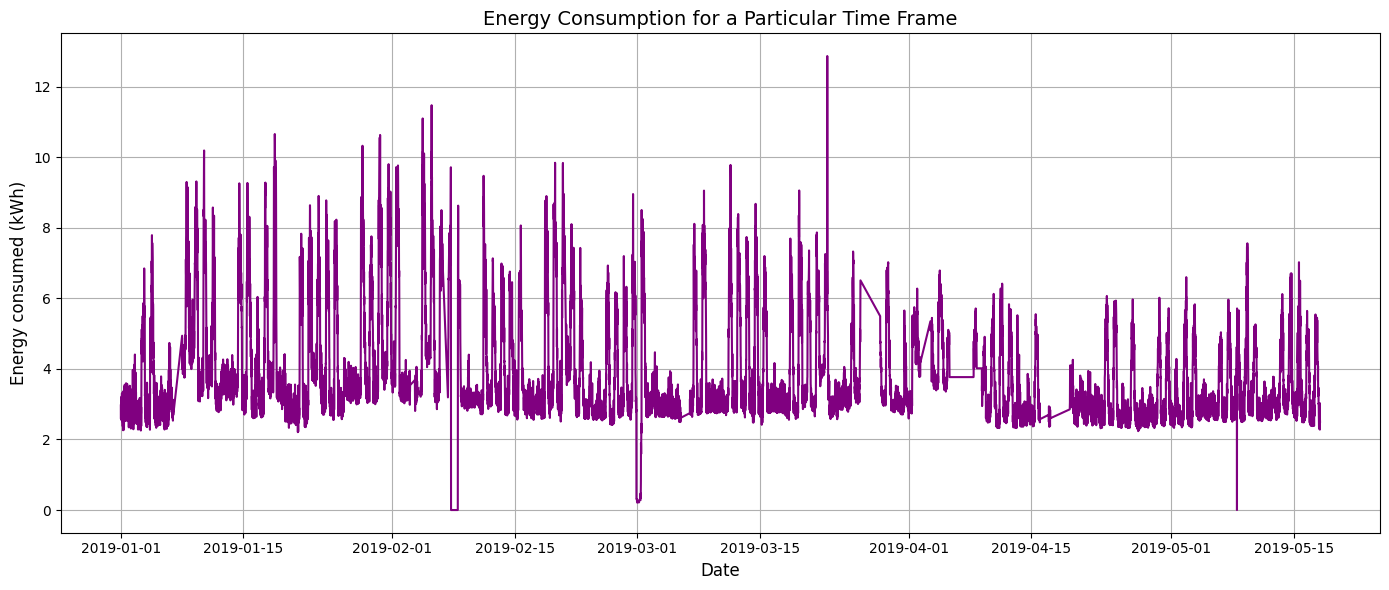

In [6]:
plt.figure(figsize=(14,6))
plt.plot(df_merged["datetime"], df_merged["Energy"], color='purple')
plt.ylabel('Energy consumed (kWh)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Energy Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()